# Problem Defination


* OBJECTIVE: Predict the species of flower given the features
* TYPE: Classification

#  Data Collection

In [115]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("himanshunakrani/iris-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/himanshunakrani/iris-dataset/versions/1


#  Understanding the Data

In [116]:
# First lets import all libraries we need to use to understand our data
# This code reads the iris dataset
# We define a variable called data and assign it with the location that contains the iris dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import  warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

path = "/root/.cache/kagglehub/datasets/himanshunakrani/iris-dataset/versions/1/iris.csv"

data = pd.read_csv(path)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [117]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [118]:
# This code counts all number of species types as you can see and group by in a pandas  dataframe
data["species"].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


In [119]:
# This code print out the number of rows and columns in the data; for this iris dataset it contain 150 rows and 5 columns
data.shape

(150, 5)

In [120]:
# This code prints the sum of the data missing , but in our data case, we have no missing values
data.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [121]:
# This code prints out the information about our data; as we can observe that , our set contain 150 rows and 5 columns
# Also we can observe that only species feature is an object the others are floats or numbers.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [122]:
# This code gives the descriptive part of our dataset.
# count: The number of observations for each feature.
# unique: The number of unique values for each feature.
# top: The most frequent value for each feature.
# freq: The frequency of the most frequent value.
# mean: The average value for each feature.
# std: The standard deviation, which measures the spread of the data.
# min: The minimum value for each feature.
# 25%: The 25th percentile (first quartile).
# 50%: The 50th percentile (median).
# 75%: The 75th percentile (third quartile).
# max: The maximum value for each feature.
data.describe(include="all")

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


#  Visualization

### Distribution of each feature

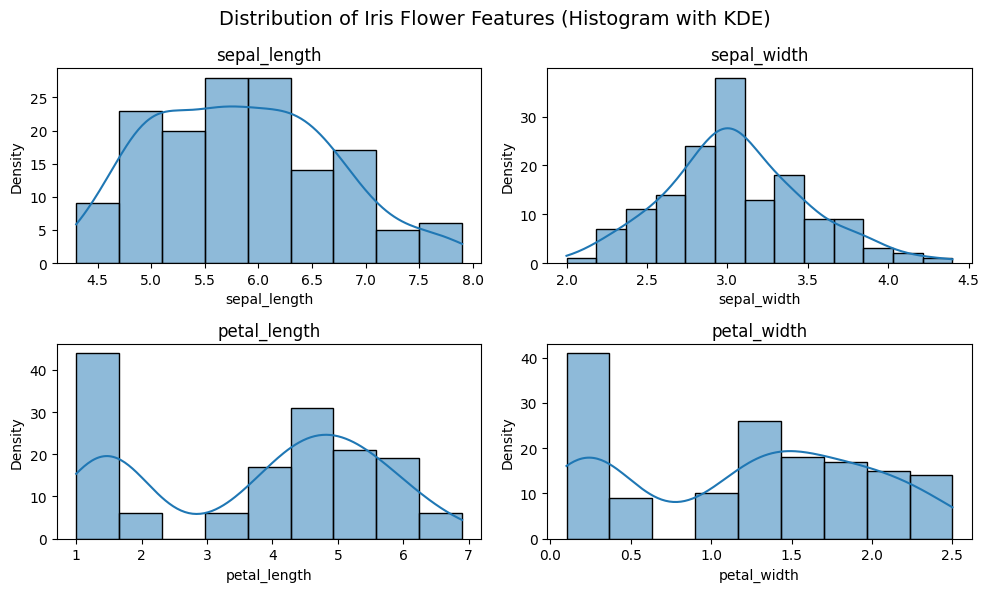

In [123]:

fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Iterate through feature columns and create histograms with KDE
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
for i, feature in enumerate(features):
    row, col = i // 2, i % 2
    sns.histplot(data=data, x=feature, kde=True, ax=axes[row, col])

# Adjust layout and titles
fig.suptitle("Distribution of Iris Flower Features (Histogram with KDE)", fontsize=14)
for ax, feature in zip(axes.flat, features):
    ax.set_title(feature)
    ax.set_xlabel(feature)
    ax.set_ylabel("Density")

# Tight layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()



* Sepal Length and Width: These features  a normal distribution, with a central peak and tapering tails. This suggests that most Iris flowers have sepal lengths and widths around the mean values, with fewer instances of very small or very large values.
*Petal Length and Width: These features show a more skewed distribution, with a longer tail towards higher values. This indicates that there are more Iris flowers with smaller petal lengths and widths, and fewer with larger values.

### Checking Outliers

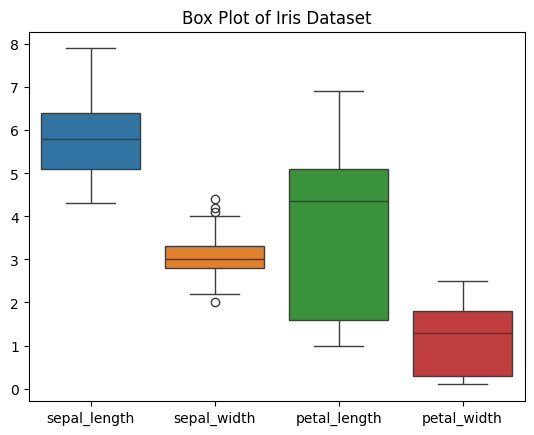

In [124]:
sns.boxplot(data=data)
plt.title('Box Plot of Iris Dataset')
plt.show()

* There are a few outliers in the sepal width feature. These outliers could be due to measurement errors or unusual specimens.

### Relationship Between the features

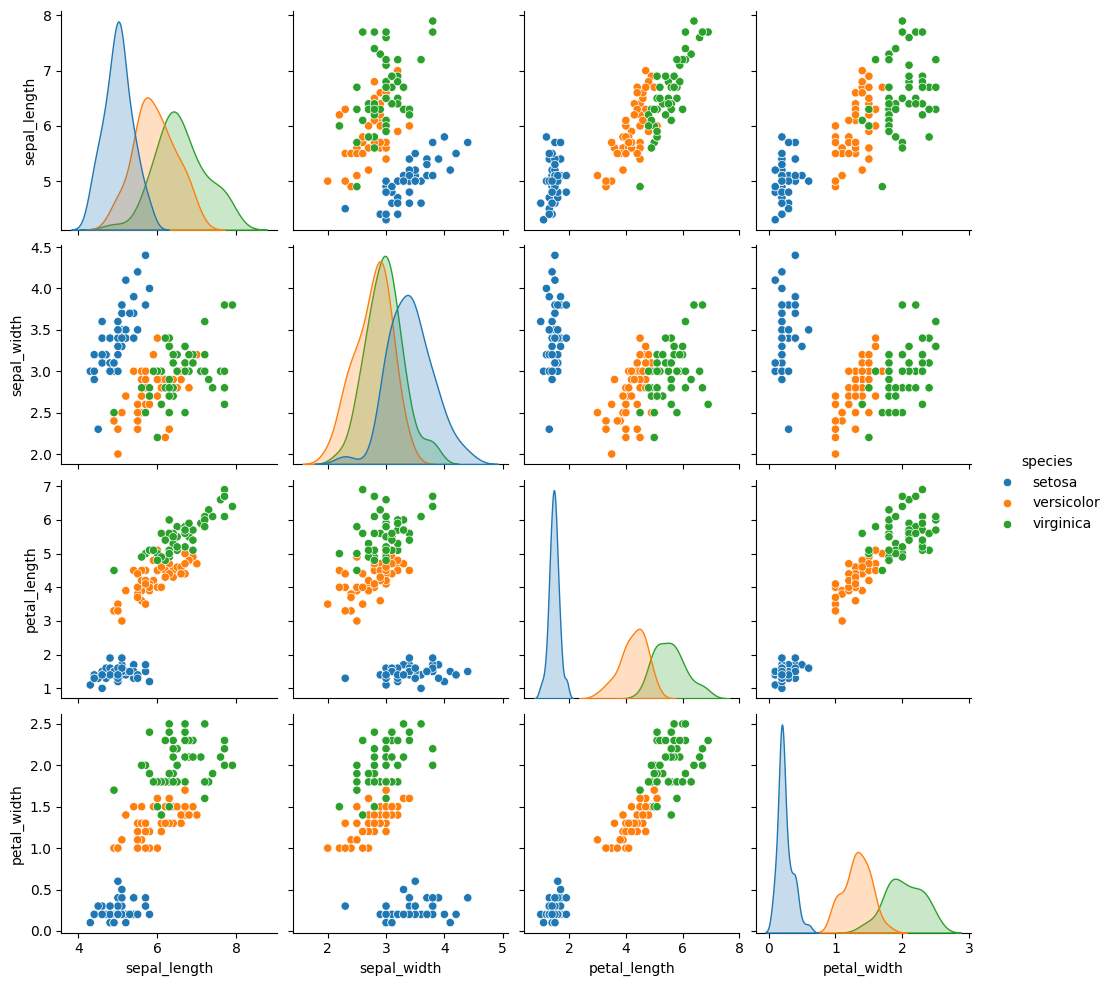

In [125]:

# Creating a pair plot to see relationship
sns.pairplot(data, hue='species')
plt.show()

* Petal Length and Width: These features seem to be the most discriminative. The clusters are well-separated based on these two features, especially for Setosa and Versicolor.
* Sepal Length and Width: While they also show some separation, the overlap is more significant, suggesting they might be less informative for classification.

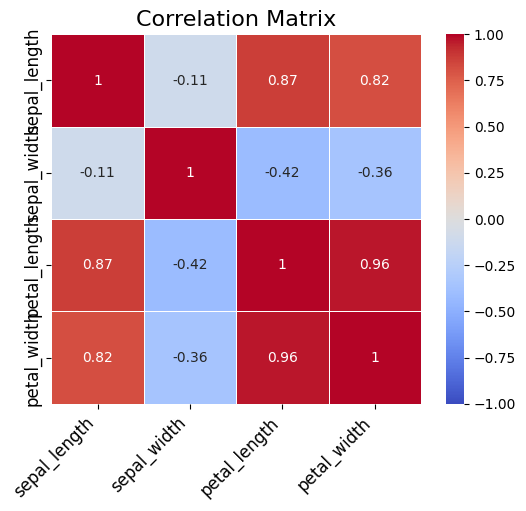

<Figure size 1000x800 with 0 Axes>

In [126]:

# Filter for numeric columns (float64) and calculate the correlation matrix
correlation_matrix = data.select_dtypes(include=["float64"]).corr()

# Visualize the correlation matrix using a heatmap with customizations
sns.heatmap(
    correlation_matrix,
    annot=True,  # Annotate values within the heatmap
    cmap='coolwarm',  # Choose a colormap (consider 'RdGy' for centered display)
    vmin=-1, vmax=1,  # Set the value range for the colormap (-1 to 1 for correlation)
    linewidths=0.5,  # Adjust line width between cells
    cbar=True,  # Include a colorbar to interpret color intensity
    square=True  # Maintain square aspect ratio for the heatmap
)

# Customize plot title, labels, and aesthetics (optional)
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate and align x-axis labels
plt.yticks(fontsize=12)  # Set y-axis label size
plt.grid(False)  # Remove gridlines for a cleaner look

# Adjust figure size based on your needs
plt.figure(figsize=(10, 8))  # Set a larger figure size (optional)

plt.tight_layout()  # Adjust spacing to prevent overlapping elements
plt.show()

* Strong Positive Correlation:

Petal Length and Petal Width: These two features exhibit a strong positive correlation. This indicates that as the petal length increases, the petal width also tends to increase. This makes intuitive sense, as larger flowers typically have both longer and wider petals.
* Moderate Positive Correlation:

Sepal Length and Petal Length: There's a moderate positive correlation between these two features. This suggests that longer sepals are often associated with longer petals.
Sepal Length and Petal Width: Similarly, there's a moderate positive correlation between sepal length and petal width.
* Weak Negative Correlation:

Sepal Width and Petal Length/Width: There's a weak negative correlation between sepal width and both petal length and petal width. This suggests that as the sepal width increases, the petal length and width tend to decrease slightly.

# Data Preproccesing

In [127]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to the 'species' column
data['species'] = label_encoder.fit_transform(data['species'])

# Display the encoded DataFrame
print("\nEncoded Data:")
data.head()


Encoded Data:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [128]:
skewness = data.skew()
print(skewness)

sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
species         0.000000
dtype: float64


In [129]:
from scipy import stats

z_scores = stats.zscore(data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
outliers = (z_scores > 3) | (z_scores < -3)

print("Outliers detected:")
print(data[outliers.any(axis=1)])

Outliers detected:
    sepal_length  sepal_width  petal_length  petal_width  species
15           5.7          4.4           1.5          0.4        0


In [130]:
# Calculate the IQR for each feature
Q1 = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].quantile(0.25)
Q3 = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] < (Q1 - 1.5 * IQR)) |
            (data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] > (Q3 + 1.5 * IQR)))

print("Outliers detected:")
print(data[outliers.any(axis=1)])

Outliers detected:
    sepal_length  sepal_width  petal_length  petal_width  species
15           5.7          4.4           1.5          0.4        0
32           5.2          4.1           1.5          0.1        0
33           5.5          4.2           1.4          0.2        0
60           5.0          2.0           3.5          1.0        1


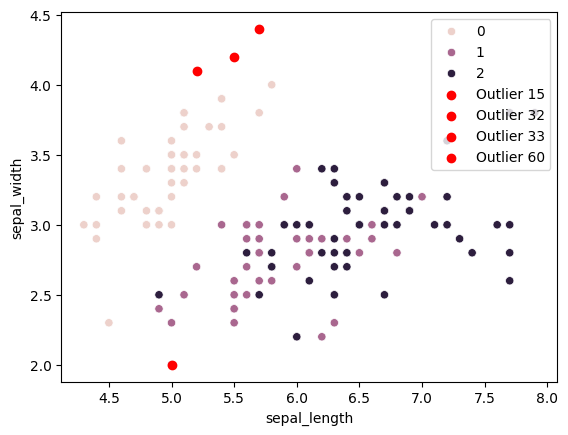

In [131]:
# This code investigates the outliers further by plotting the scatter plots

sns.scatterplot(x='sepal_length', y='sepal_width', data=data, hue='species')
plt.scatter(5.7, 4.4, color='red', label="Outlier 15")
plt.scatter(5.2, 4.1, color='red', label="Outlier 32")
plt.scatter(5.5, 4.2, color='red', label="Outlier 33")
plt.scatter(5.0, 2.0, color='red', label="Outlier 60")
plt.legend()
plt.show()


In [141]:

median_sepal_width = data['sepal_width'].median()
data.loc[60, 'sepal_width'] = median_sepal_width
data.loc[60]


,60
sepal_length,5.0
sepal_width,3.0
petal_length,3.5
petal_width,1.0
species,1.0


In [139]:
data.shape

(150, 5)

# Training/Testing

In [142]:
X = data.drop('species', axis=1)
y = data["species"]
X.shape


(150, 4)

In [143]:
from sklearn.preprocessing import StandardScaler


scaler =  StandardScaler()
X = scaler.fit_transform(X)
X.shape

(150, 4)

#  Splitting the data into Training/ Testing

In [144]:
from sklearn.model_selection import train_test_split
# Spliting  the dataset into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")



Training set size: 120 samples
Testing set size: 30 samples


# Model importing from sklearn and utilizing the model , we will use classification models

In [145]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)
accuracy = model.score(X_test, y_test)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

Decision Tree Accuracy: 1.00


In [146]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")


Logistic Regression Accuracy: 1.00


In [147]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f"Random Forest Accuracy: {accuracy:.2f}")


Random Forest Accuracy: 1.00


In [148]:
from sklearn.svm import SVC

model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f"SVM Accuracy: {accuracy:.2f}")


SVM Accuracy: 0.97


In [149]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f"k-NN Accuracy: {accuracy:.2f}")


k-NN Accuracy: 1.00


# Evaluation Metrics

In [152]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

